In [25]:
from seismic_purifier import RepresentationLearningSingleAutoencoder, RepresentationLearningDenoisingSingleAutoencoder, RepresentationLearningMultipleAutoencoder
from seismic_purifier import ClassifierAutocovariance, ClassifierAugmentedAutoencoder, ClassifierMultipleAutoencoder
from kfold_tester import KFoldTester
from evaluator import Evaluator, CropOffsetFilter
from sklearn.metrics import auc

In [26]:
# Experiment name.
EXP_NAME = "exp_test"

# Should be RepresentationLearningSingleAutoencoder, RepresentationLearningDenoisingSingleAutoencoder or RepresentationLearningMultipleAutoencoder
REPRESENTATION_LEARNING_MODEL_CLASS = RepresentationLearningMultipleAutoencoder
CLASSIFIER_MODEL_CLASS = ClassifierMultipleAutoencoder

# Should be stead or instance.
TRAIN_DATASET = "instance"
TEST_DATASET = "stead"

# Number of epochs
EPOCHS = [9]

# Split.
SPLIT = 0

In [27]:
tester = KFoldTester(
    EXP_NAME,
    REPRESENTATION_LEARNING_MODEL_CLASS,
    CLASSIFIER_MODEL_CLASS,
    train_dataset=TRAIN_DATASET,
    test_dataset=TEST_DATASET,
    split=SPLIT,
    epochs=EPOCHS
)
tester.test()

In [28]:
filters = [CropOffsetFilter()]
evaluator = Evaluator(exp_name = EXP_NAME, 
                      representation_learning_model_class=REPRESENTATION_LEARNING_MODEL_CLASS, 
                      classifier_model_class = CLASSIFIER_MODEL_CLASS, 
                      train_dataset = TRAIN_DATASET, 
                      test_dataset = TEST_DATASET, 
                      filters = filters, 
                      epochs = EPOCHS, 
                      split = SPLIT,
                      method_params={})

In [29]:
roc_vectors = evaluator.get_roc_vectors()
fpr = roc_vectors[0]["fpr"]
tpr = roc_vectors[0]["tpr"]
roc_auc = auc(roc_vectors[0]["fpr"], roc_vectors[0]["tpr"])
print(roc_auc)

0.9789436402373652


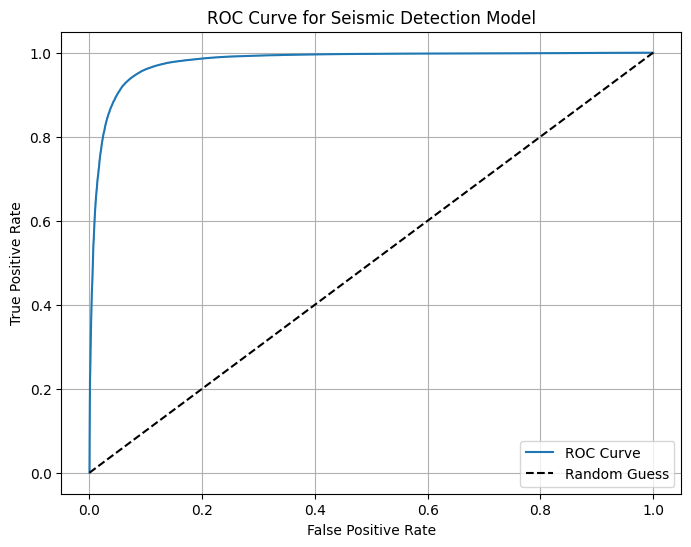

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for Seaborn
roc_data = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

plt.figure(figsize=(8, 6))
sns.lineplot(data=roc_data, x='False Positive Rate', y='True Positive Rate', label='ROC Curve')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Seismic Detection Model')
plt.legend()
plt.grid(True)
plt.show()